In [28]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
def imshow(img):
    plt.figure(figsize = (10,7))
    plt.imshow(img)

In [85]:
img = cv2.imread('img/fry.png')
#fry = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

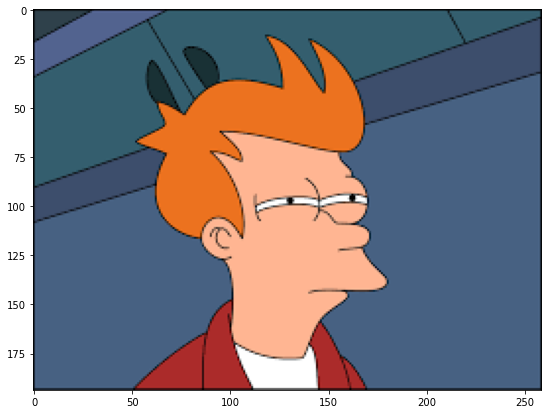

In [86]:
imshow(img)

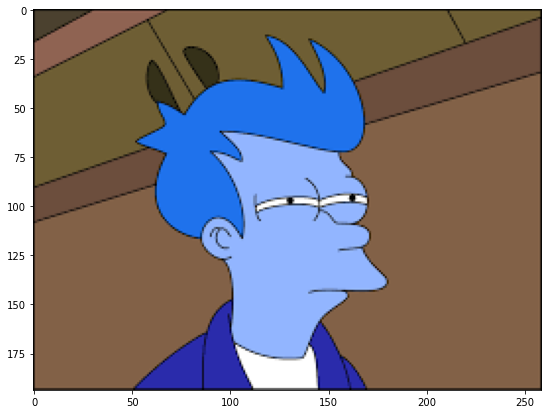

In [87]:
imshow(fry)

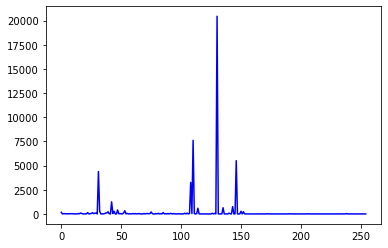

In [89]:
hist_blue = cv2.calcHist([img],[0],None,[255],[0,255])
plt.plot(hist_blue,color='b')

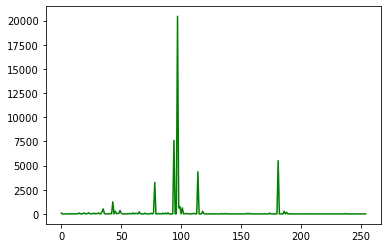

In [90]:
hist_green = cv2.calcHist([img],[1],None,[255],[0,255])
plt.plot(hist_green,color='g')

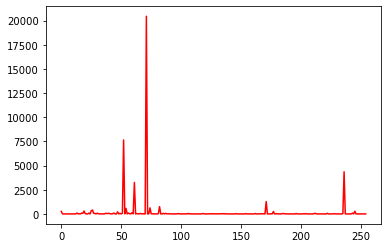

In [91]:
hist_red = cv2.calcHist([img],[2],None,[255],[0,255])
plt.plot(hist_red,color='r')

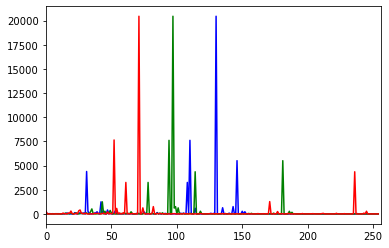

In [92]:
colors = ['b','g','r']
for i, color in enumerate(colors):
    histogram = cv2.calcHist([img],[i],None,[255],[0,255])
    plt.plot(histogram, color =color)
    plt.xlim(0,256)
plt.show()

In [15]:
!ls img

4.png                day4.jpg             noisy.png
blue-flowers.jpg     fry.png              notes.png
blue-red-flowers.png n.png                purple-flowers.jpg
clean-text.jpg       night1.jpg           scan.jpg
day1.jpg             night2.jpg           sketch.png
day2.jpg             night3.png           text.png
day3.jpg             night4.jpg


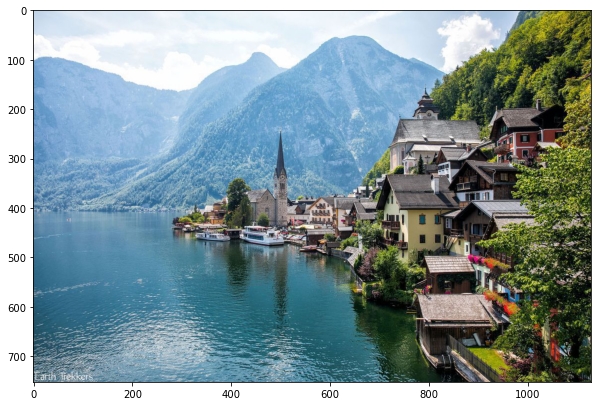

In [93]:
day = cv2.imread('img/day1.jpg')
imshow(day)

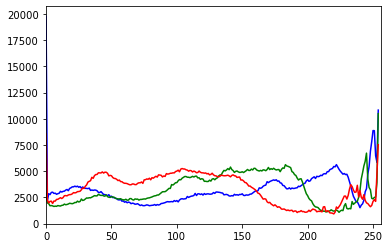

In [95]:
colors = ['b','g','r']
for i, color in enumerate(colors):
    histogram = cv2.calcHist([day],[i],None,[255],[0,255])
    plt.plot(histogram, color =color)
    plt.xlim(0,256)
plt.show()

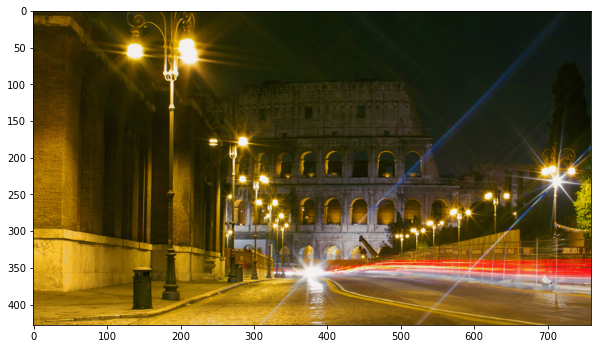

In [96]:
night = cv2.imread('img/night1.jpg')
imshow(night)

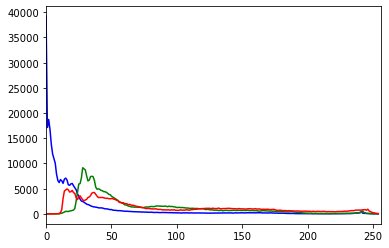

In [97]:
colors = ['b','g','r']
for i, color in enumerate(colors):
    histogram = cv2.calcHist([night],[i],None,[255],[0,255])
    plt.plot(histogram, color =color)
    plt.xlim(0,256)
plt.show()

In [59]:
translation_matrix = np.float32([
    [1,0,-25],
    [0,1,-50]
])

In [60]:
translation_matrix

array([[  1.,   0., -25.],
       [  0.,   1., -50.]], dtype=float32)

In [61]:
!ls img

4.png                day4.jpg             noisy.png
blue-flowers.jpg     fry.png              notes.png
blue-red-flowers.png n.png                purple-flowers.jpg
clean-text.jpg       night1.jpg           scan.jpg
day1.jpg             night2.jpg           sketch.png
day2.jpg             night3.png           text.png
day3.jpg             night4.jpg


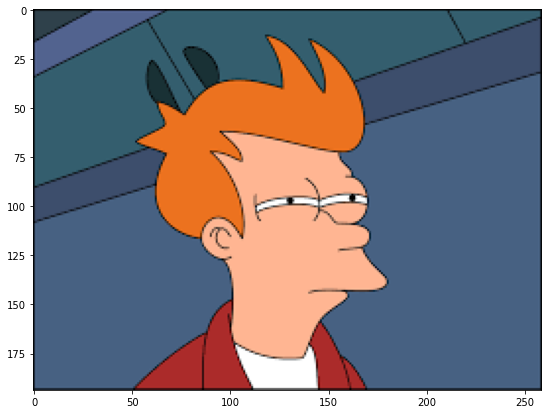

In [98]:
imshow(img)

In [63]:
h, w = fry.shape[:2]

In [64]:
img_moved  = cv2.warpAffine(fry,translation_matrix,(w,h))

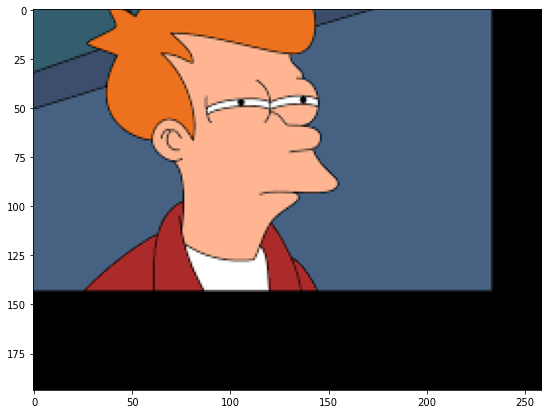

In [65]:
imshow(img_moved)

In [72]:
x_center = w//2
y_center = h//2
rotation_matrix = cv2.getRotationMatrix2D((x_center,y_center),50,1)

In [73]:
rotation_matrix

array([[  0.64278761,   0.76604444, -28.22591263],
       [ -0.76604444,   0.64278761, 133.46933502]])

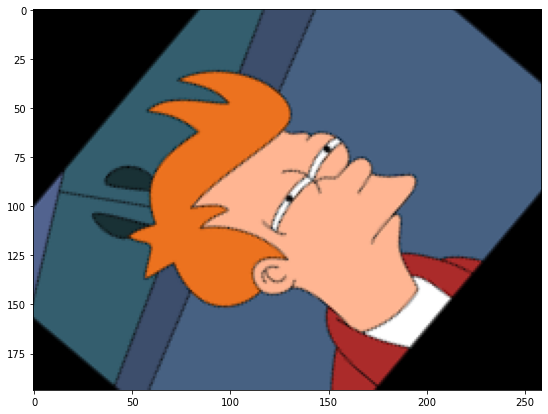

In [99]:
fry_rotated = cv2.warpAffine(img,rotation_matrix,(w,h))
imshow(fry_rotated)

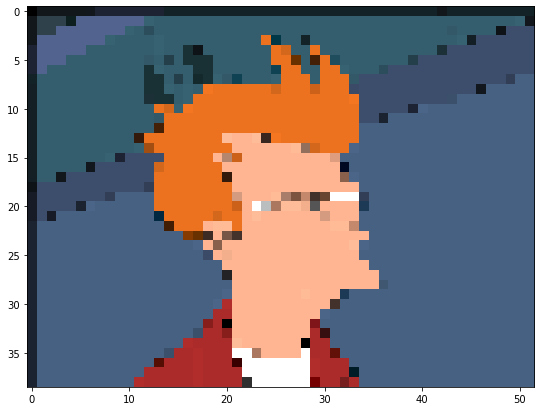

In [105]:
new_width = w//2
new_height = h//2
img_half_size = cv2.resize(img,(new_width,new_height), interpolation = cv2.INTER_NEAREST)
img_half_size_2 = cv2.resize(img,None,fx=0.2,fy=0.2, interpolation = cv2.INTER_NEAREST)

imshow(img_half_siz)

In [111]:
canvas = np.zeros((400,400),np.uint8)

In [112]:
canvas

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

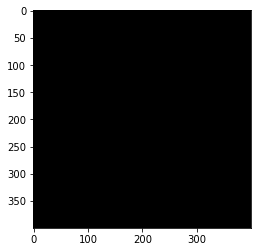

In [113]:
plt.imshow(canvas,cmap ='gray')

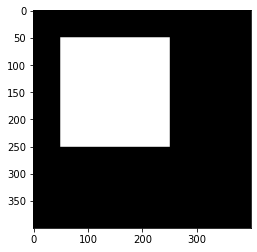

In [116]:
square = canvas.copy()
cv2.rectangle(square, (50,50),(250,250),255,-1)
plt.imshow(square,cmap='gray')

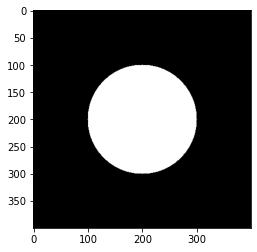

In [117]:
circle = canvas.copy()
cv2.circle(circle,(200,200),100,255,-1 )
plt.imshow(circle,cmap='gray')

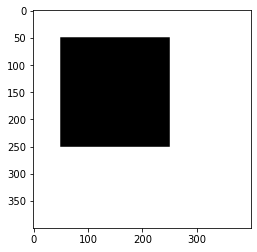

In [118]:
square_negative= cv2.bitwise_not(square) #color invert
plt.imshow(square_negative,cmap='gray')

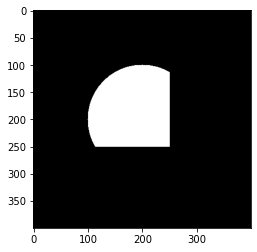

In [119]:
img_and = cv2.bitwise_and(square,circle) #order dont change
plt.imshow(img_and, cmap='gray')

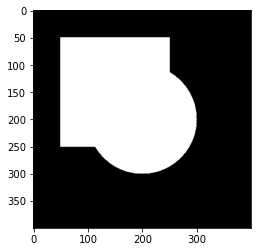

In [120]:
img_or = cv2.bitwise_or(square,circle)
plt.imshow(img_or, cmap='gray')

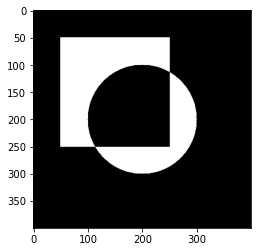

In [121]:
img_xor = cv2.bitwise_xor(square,circle)
plt.imshow(img_xor, cmap='gray')

In [134]:
blur_kernel = np.ones((9,9),np.float32)/81 #(3,3)/9

In [135]:
blur_kernel

array([[0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],


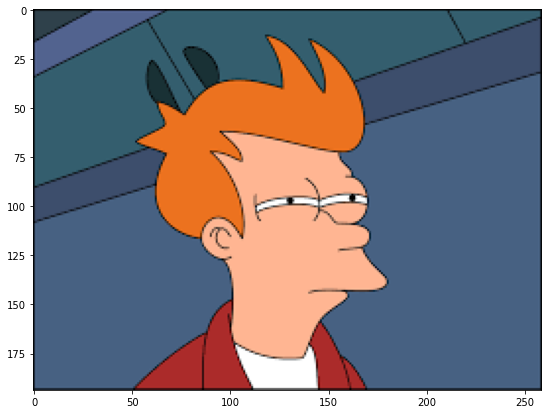

In [136]:
imshow(img)

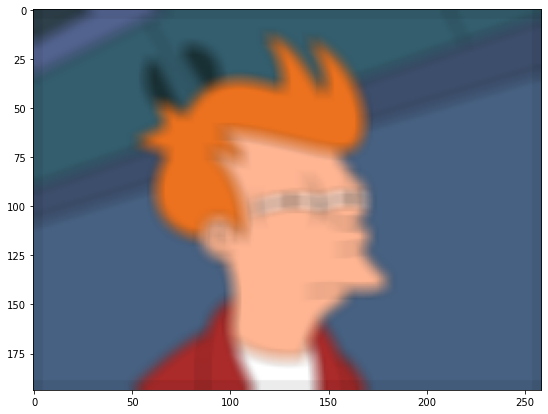

In [137]:
blur_fry = cv2.filter2D(img,-1,blur_kernel)
imshow(blur_fry)

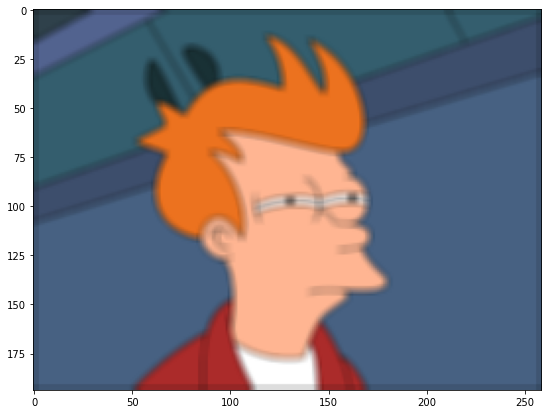

In [138]:
fry_blur = cv2.blur(img,(5,5))
imshow(fry_blur)